# Introdução:

Análise de Dataset: Letras de Músicas

Este notebook compõe uma série de notebooks que tem como objetivo explorar e aplicar técnicas de NLP sobre o dataset `song_lyrics.csv`, conforme solicitado na prova prática para o CAEd.


# Configuração

In [ ]:
# Bibliotecas necessárias
import pandas as pd
import numpy as np
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import re

# Baixando Dataset do Drive com gdown e extraindo zip
Link do Dataset: https://drive.google.com/file/d/13T_SXgmSh9qGS2MJXZqQL6BQjfMs4S3c/view?usp=sharing

In [ ]:
# Baixar com gdown
!gdown 13T_SXgmSh9qGS2MJXZqQL6BQjfMs4S3c

# Descompactar
with zipfile.ZipFile('dataset - letras.zip', 'r') as zip_ref:
    zip_ref.extractall('letras_dataset')

# Verificar arquivos
!ls letras_dataset

# Leituras

## Opção 1: Amostra criada anteriormente

In [ ]:
# Deve-se subir a amostra para o ambiente do colab. O nome do arquivo deve estar na variável path entre aspas
path = 'amostra_song_lyrics10.csv'
df = pd.read_csv(path)
df.head()

,title,tag,artist,year,views,features,lyrics,language
0,Ducky,rap,North Star (USA),2004,143,"{""Meko the Pharaoh"",Christbearer}","""Oh you'll love her"" (repeats all throughout)\...",en
1,The Heist Revisited,rap,Big L,2000,5204,{},"[Big L]\nYeah, yeah\nYeah-yeah, yeah-yeah-yeah...",en
2,Chinese New Year,rap,Clipse,2006,22502,"{""Roscoe P. Coldchain""}",[Chorus: Pusha T & Pharrell]\nI'm at your door...,en
3,Pop That Cannon,rap,Cassidy,2004,677,"{""Styles P"",""Swizz Beatz""}","[Intro - Swizz Beatz]\nAooow! banger, let's go...",en
4,Been This Way,rap,Scribe,2003,1014,{},[Intro]\nEvery MC in this industry wants one t...,en


## Opção 2: Lendo com chuncksize e criando amostra

In [ ]:
# Caminho do CSV
csv_path = 'letras_dataset/song_lyrics.csv'

# Colunas desejadas
usecols = ['title', 'tag', 'artist', 'year', 'views', 'features', 'lyrics', 'language']

# Parâmetros
chunksize = 50_000  # número de linhas por chunk
sample_frac = 0.1   # fração da amostra por chunk (10%)

# Lista para armazenar amostras
samples = []

# Leitura por chunks
for chunk in pd.read_csv(csv_path, usecols=usecols, chunksize=chunksize):
  sample = chunk.sample(frac=sample_frac, random_state=42)
  samples.append(sample)

# Concatenar todos os pedaços amostrados
df = pd.concat(samples).reset_index(drop=True)

# Visualizar forma e colunas
print(f"Total de linhas na amostra: {df.shape[0]}")
df.head()

# Salva a amostra reduzida
df.to_csv('amostra_song_lyrics10.csv', index=False)
print("Arquivo salvo como amostra_song_lyrics10.csv")

Total de linhas na amostra: 513486
Arquivo salvo como amostra_song_lyrics.csv


# Análise Exploratória

## Conhecendo os Dados

In [ ]:
# Exibir a forma do DataFrame (número de linhas e colunas)
df.shape

(513486, 8)

In [ ]:
# Exibir as "n" primeiras linhas do DataFrame
n = 10
df.head(n)

,title,tag,artist,year,views,features,lyrics,language
0,Ducky,rap,North Star (USA),2004,143,"{""Meko the Pharaoh"",Christbearer}","""Oh you'll love her"" (repeats all throughout)\...",en
1,The Heist Revisited,rap,Big L,2000,5204,{},"[Big L]\nYeah, yeah\nYeah-yeah, yeah-yeah-yeah...",en
2,Chinese New Year,rap,Clipse,2006,22502,"{""Roscoe P. Coldchain""}",[Chorus: Pusha T & Pharrell]\nI'm at your door...,en
3,Pop That Cannon,rap,Cassidy,2004,677,"{""Styles P"",""Swizz Beatz""}","[Intro - Swizz Beatz]\nAooow! banger, let's go...",en
4,Been This Way,rap,Scribe,2003,1014,{},[Intro]\nEvery MC in this industry wants one t...,en
5,Outro Red Bandana,rap,The Game,2005,15092,{},"[Intro]\nNot, Blackwall Street, The Game, Beac...",en
6,Ruff Ruff,rap,Boogie Down Productions,1992,1394,"{""Freddie Foxxx""}",[Intro: KRS-One + Freddie Foxxx]\nTah! Think y...,en
7,Ghettobusiness,rap,Kollegah,2008,8054,{},"[Hook]\nYeah, der King im Dopegame, Cocainever...",de
8,Dog Eat Dog,rap,De La Soul,1996,5661,{},[Chorus]\nIt's a dog eat dog competition (no d...,en
9,Adios,rap,Nino Brown [O.G. Enius],2005,168,{},"[Nino Brown]\nYeah, whatever, Ray\nUh, uh, uh ...",en


In [ ]:
# Exibir as "n" últimas linhas do DataFrame
n = 10
df.tail(n)

,title,tag,artist,year,views,features,lyrics,language
513476,Fast Life Snippet,rap,Sa4,2022,29,{},"[Part]\n[...]\nSeit Tag eins, 187 immer in' Sc...",de
513477,Bring a Little Lovin,rock,The Easybeats,1968,1,{},[Verse 1]\nI know that it's ten\nAnd you're st...,en
513478,Дисплей Display,rock,GG (KOPENGAGEN),2022,6,"{""КОПЕНGАGЕН (KOPENGAGEN)""}",[Текст песни «Дисплей»]\n\n[Куплет 1]\nНовая э...,ru
513479,Well come to the BOM,pop,BerryGood (),2019,8,"{""BerryGood (베리굿)""}",매일매일 똑같은 내 하루에\n깜짝 기적 같은 일인 걸\n점점 네가 내게 들어와\n자...,ko
513480,Stamp on the Ground - Megastylez Remix,pop,ItaloBrothers,2010,1,{},[Chorus]\nStamp on the ground\nMove it all aro...,en
513481,Yine Aşk Var,pop,Zuhal Olcay,2009,6,{},"[""Yine Aşk Var"" için şarkı sözleri]\n\n[Bölüm ...",tr
513482,Secreto,rap,Ryan Castro,2018,6,{},"[Letra de ""Secreto""]\n\n[Intro]\nYeah\nGHomiez...",es
513483,Plastic Hearts - Live,rock,Miley Cyrus,2022,306,{},[Verse 1]\nHello\nThe sunny place for shady pe...,en
513484,The Beach Is So Played Out,rock,Slowlyfaintly,2021,2,{},"[Verse 1]\nI'm so busy, the clock keeps spinni...",en
513485,SUHO - Hurdle English Translation,pop,Genius English Translations,2022,2571,{},"[Verse 1]\nOh, what's your secret formula?\nOh...",en


In [ ]:
# Exibir as colunas do DataFrame
df.columns

Index(['title', 'tag', 'artist', 'year', 'views', 'features', 'lyrics',
       'language'],
      dtype='object')

In [ ]:
# Exibir os tipos de dados de cada coluna
df.dtypes

,0
title,object
tag,object
artist,object
year,int64
views,int64
features,object
lyrics,object
language,object


In [ ]:
# Exibir resumo das informações do DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513486 entries, 0 to 513485
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   title     513466 non-null  object
 1   tag       513486 non-null  object
 2   artist    513486 non-null  object
 3   year      513486 non-null  int64 
 4   views     513486 non-null  int64 
 5   features  513486 non-null  object
 6   lyrics    513486 non-null  object
 7   language  490720 non-null  object
dtypes: int64(2), object(6)
memory usage: 31.3+ MB


In [ ]:
# Verificar valores ausentes em cada coluna
df.isnull().sum()

,0
title,20
tag,0
artist,0
year,0
views,0
features,0
lyrics,0
language,22766


In [ ]:
# Verificar se há dados duplicados no DataFrame
df.duplicated().sum()

np.int64(0)

## Análises Quantitativas e Qualitativas

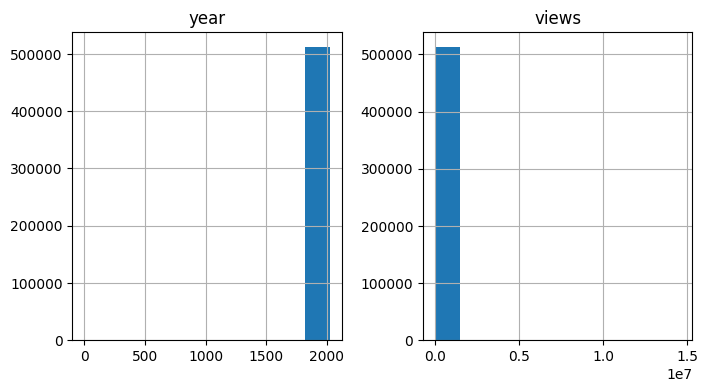

In [ ]:
# Distribuição das nossas variáveis quantitativas
df.hist(figsize=(8,4));

In [ ]:
# Correlações entre as variáveis
correlacao = df.select_dtypes(include=np.number).corr()
correlacao

,year,views
year,1.000000,0.002039
views,0.002039,1.000000


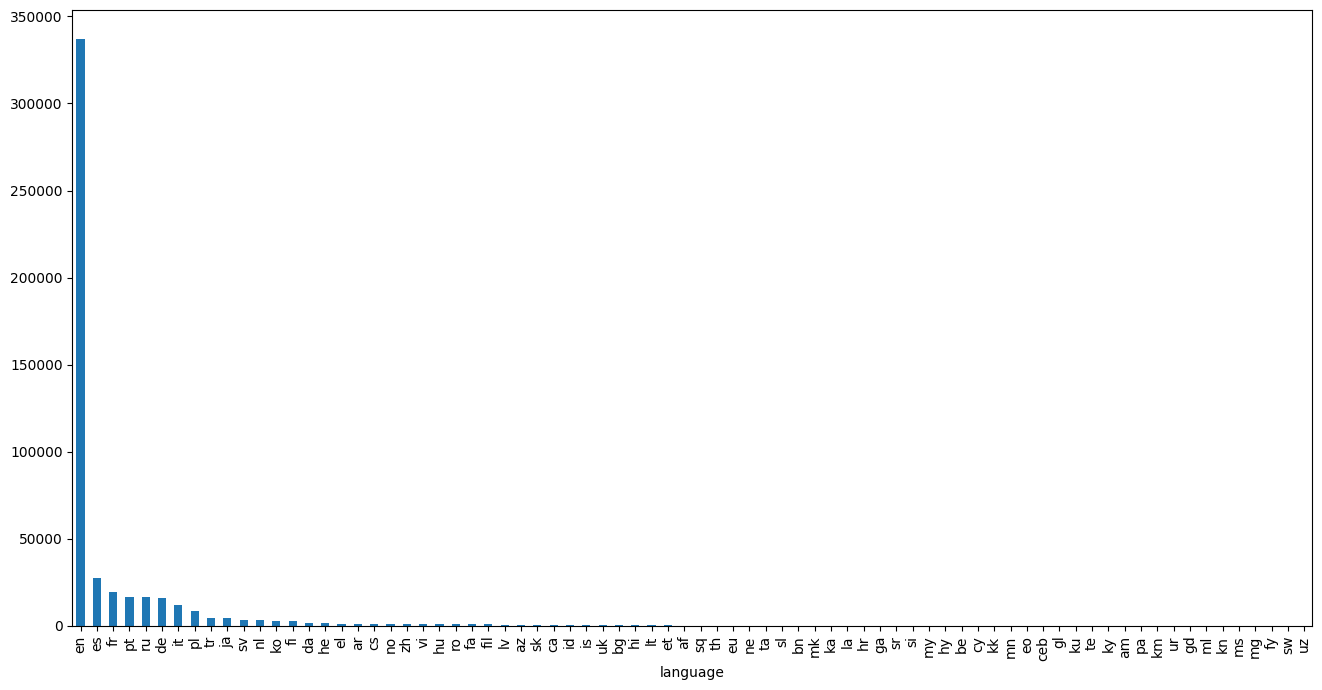

In [ ]:
# Distribuição de idiomas (variável categórica):
df['language'].value_counts().plot(kind='bar', figsize=(16,8));

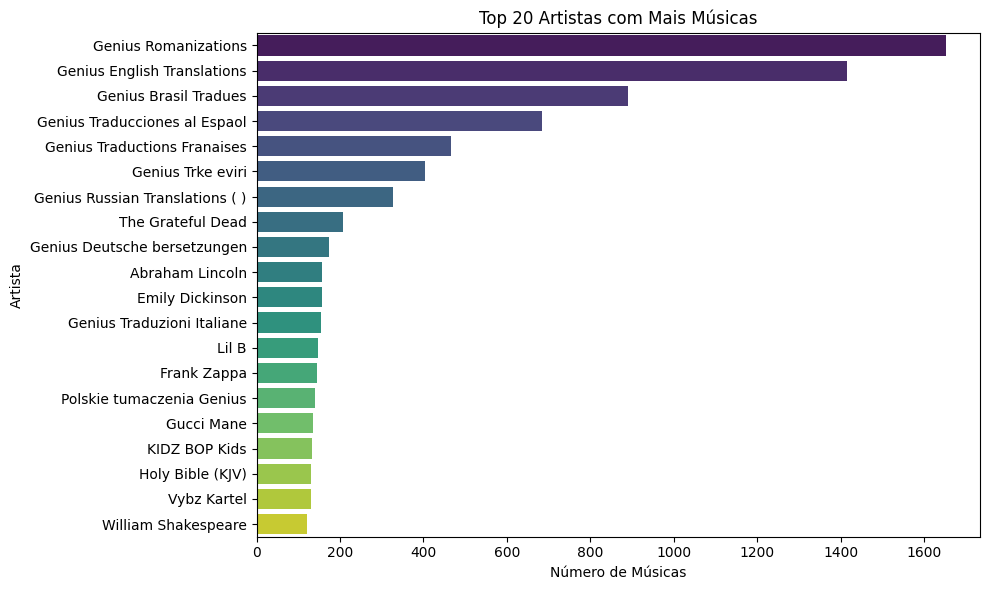

In [ ]:
# Músicas por artista
top_artistas = df['artist'].value_counts().head(20)

plt.figure(figsize=(10,6))
sns.barplot(y=top_artistas.index, x=top_artistas.values, palette='viridis', hue=top_artistas.index)
plt.title('Top 20 Artistas com Mais Músicas')
plt.xlabel('Número de Músicas')
plt.ylabel('Artista')
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Número de músicas')

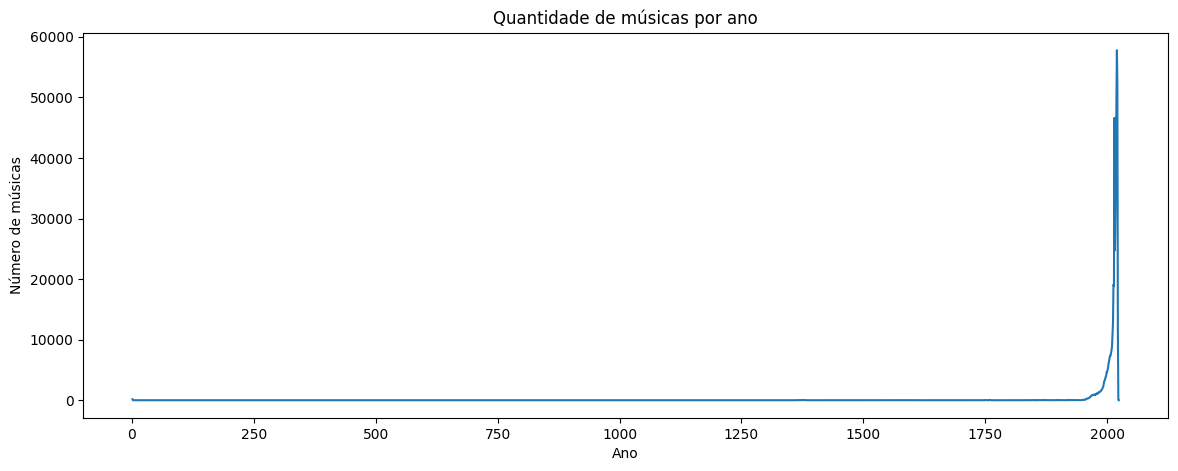

In [ ]:
# Músicas Por Ano
plt.figure(figsize=(14,5))
sns.lineplot(data=df.groupby('year').size())
plt.title("Quantidade de músicas por ano")
plt.xlabel("Ano")
plt.ylabel("Número de músicas")

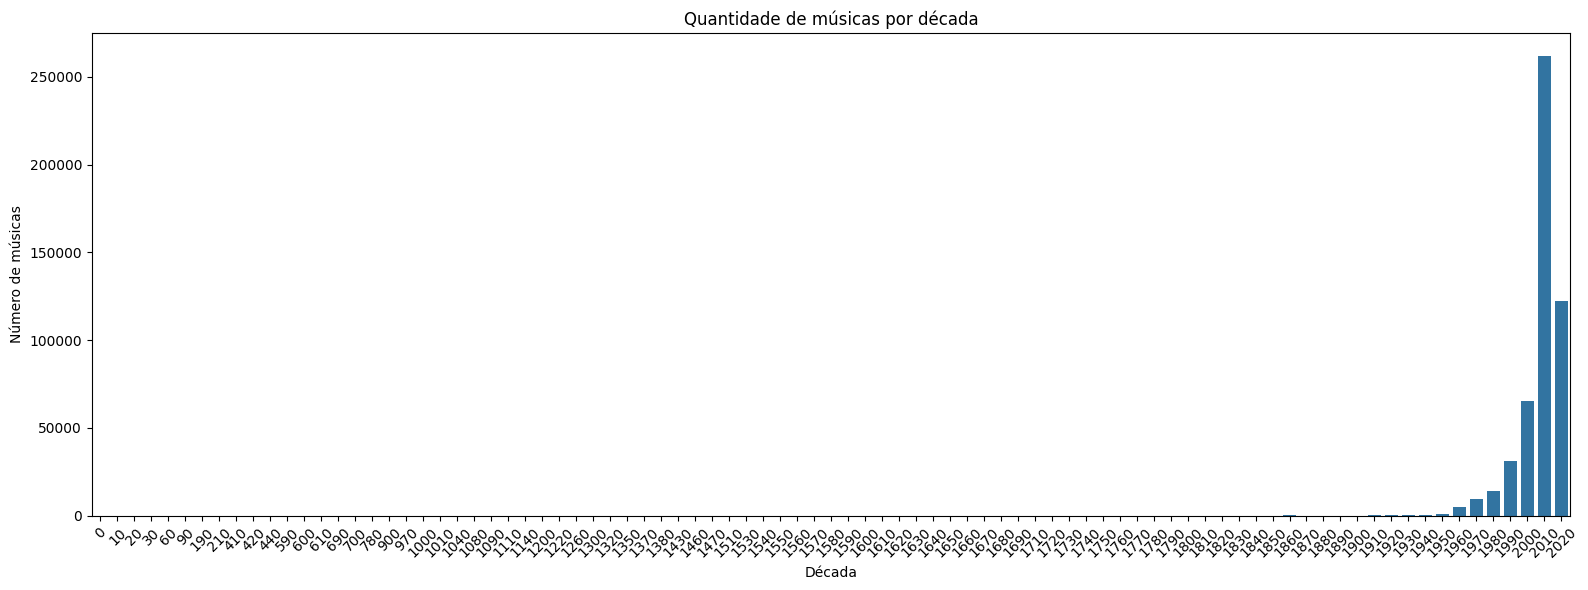

In [ ]:
# Músicas por década
df['decade'] = (df['year'] // 10) * 10

plt.figure(figsize=(16,6))
sns.countplot(data=df, x='decade', order=sorted(df['decade'].dropna().unique()))
plt.xticks(rotation=45)
plt.title('Quantidade de músicas por década')
plt.xlabel('Década')
plt.ylabel('Número de músicas')
plt.tight_layout()
plt.show()

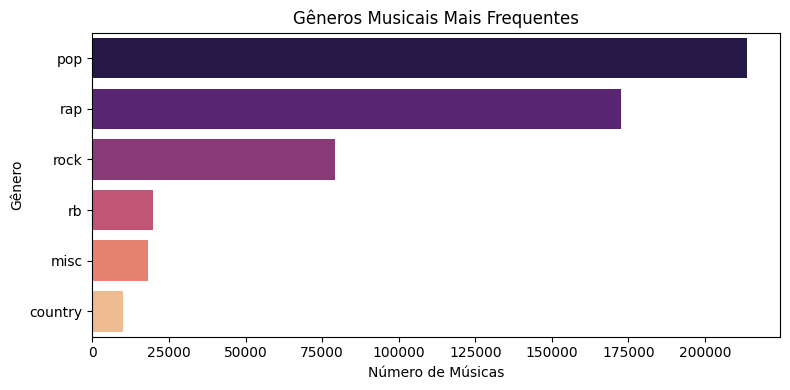

In [ ]:
# Gêneros musicais mais frequentes
top_tags = df['tag'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(x=top_tags.values, y=top_tags.index, palette='magma', hue=top_tags.index)
plt.title('Gêneros Musicais Mais Frequentes')
plt.xlabel('Número de Músicas')
plt.ylabel('Gênero')
plt.tight_layout()
plt.show()

## Detecção de Livros e poemas

Média: 307.66
Mediana: 245.00


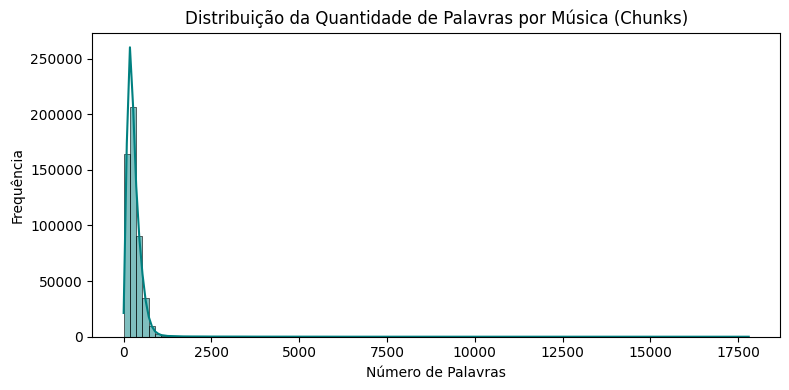

In [ ]:
# Densidade média de palavras por música

path = 'amostra_song_lyrics10.csv'

chunksize = 10000
word_counts = []

for chunk in pd.read_csv(path, usecols=['lyrics'], chunksize=chunksize):
    chunk = chunk['lyrics'].dropna().apply(lambda x: len(str(x).split()))
    word_counts.extend(chunk.tolist())

# Cálculos
import numpy as np
print(f"Média: {np.mean(word_counts):.2f}")
print(f"Mediana: {np.median(word_counts):.2f}")

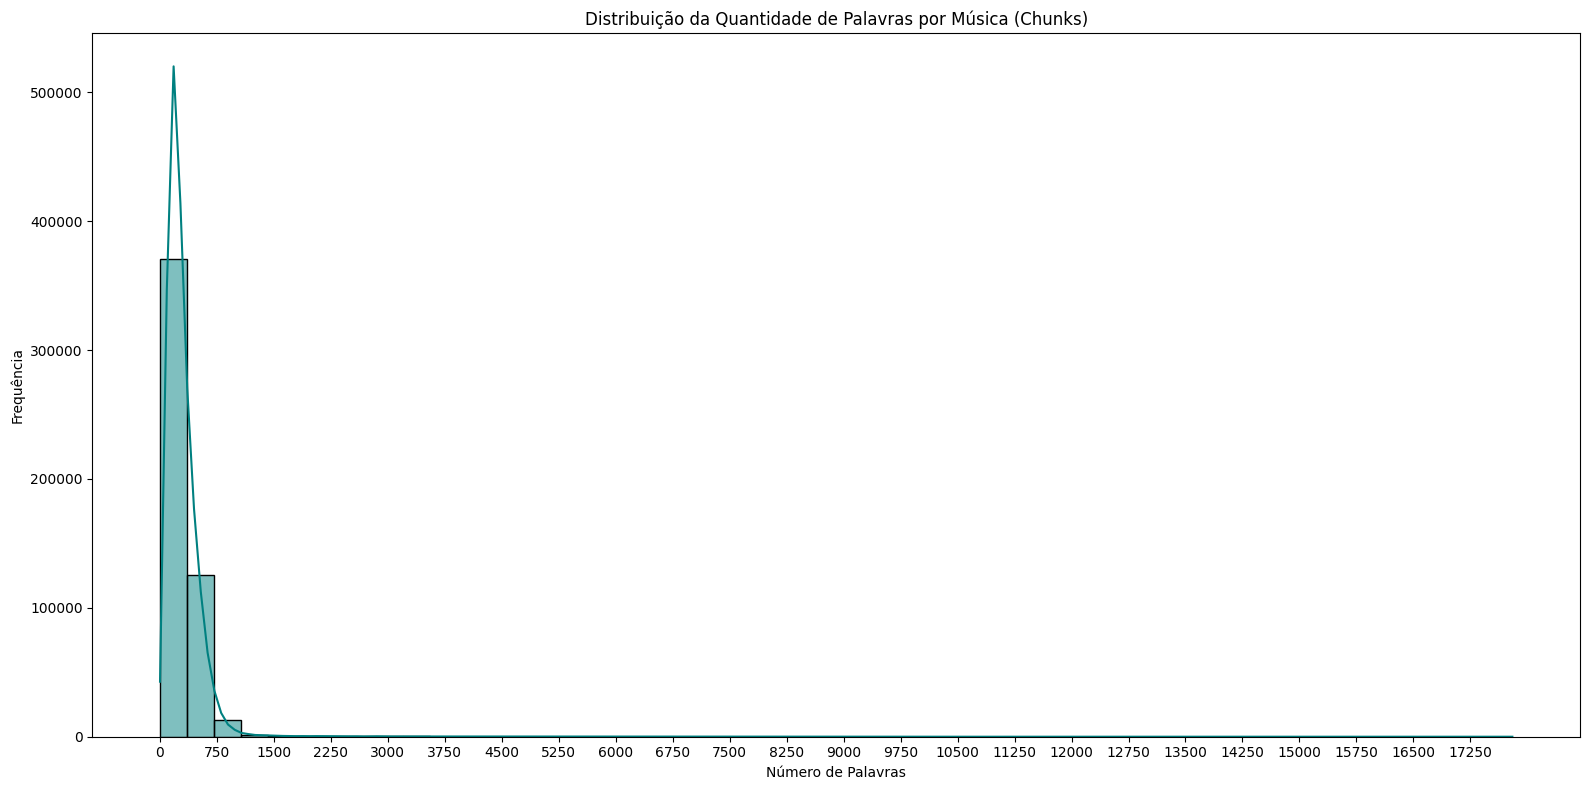

In [ ]:
# Visualização
plt.figure(figsize=(16,8))
sns.histplot(word_counts, bins=50, kde=True, color='teal')
plt.xticks(ticks=range(0, 18000, 750))
plt.title('Distribuição da Quantidade de Palavras por Música (Chunks)')
plt.xlabel('Número de Palavras')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

In [ ]:
# Encontrar a letra mais longa

path = 'amostra_song_lyrics10.csv'
chunksize = 10000

max_word_count = 0
maior_entrada = None  # vai armazenar a linha inteira com mais palavras

for chunk in pd.read_csv(path, usecols=['title', 'artist', 'tag', 'lyrics'], chunksize=chunksize):
    chunk['word_count'] = chunk['lyrics'].dropna().apply(lambda x: len(str(x).split()))

    if not chunk['word_count'].empty:
        max_idx = chunk['word_count'].idxmax()
        if chunk.loc[max_idx, 'word_count'] > max_word_count:
            max_word_count = chunk.loc[max_idx, 'word_count']
            maior_entrada = chunk.loc[max_idx]

# Exibir informações da entrada mais longa
print("Letra com maior número de palavras:")
print(maior_entrada[['title', 'artist', 'tag', 'word_count']])
print("\nInício da letra (preview):")
print(maior_entrada['lyrics'][:1000])  # Mostra só os 1000 primeiros caracteres

Letra com maior número de palavras:
title         On Duties De Officiis - Book III
artist                   Marcus Tullius Cicero
tag                                       misc
word_count                               17803
Name: 15572, dtype: object

Início da letra (preview):
1. My son Marcus, Cato, who was nearly of the same age1 with Publius Scipio, the first of the family that bore the name of Africanus, represents him as in the habit of saying that he was never less at leisure than when he was at leisure, or less alone than when he was alone, — a truly magnificent utterance and worthy of a great and wise man, indicating that in leisure he was wont to think of business2 and in solitude to commune with himself,3 so that he was never idle, and had no need betweenwhile4 of another person’s conversation. Thus the two things, leisure and solitude, which with others occasion languor, quickened his energies. I could wish that I were able to say the same; but if I cannot by imitation atta

In [ ]:
# Função para analisar estrutura poética
def analisar_estrutura(letra):
    if not isinstance(letra, str) or not letra.strip():
        return None

    # Limpa e divide em linhas não vazias
    linhas = [linha.strip() for linha in letra.split('\n') if linha.strip()]
    total_linhas = len(linhas)
    if total_linhas < 8:  # exige pelo menos 8 linhas
        return None

    # Linhas curtas: menos de 7 palavras
    linhas_curtas = [linha for linha in linhas if len(linha.split()) < 7]
    proporcao_curtas = len(linhas_curtas) / total_linhas

    # Linhas repetidas
    linhas_repetidas = total_linhas - len(set(linhas))
    proporcao_repetidas = linhas_repetidas / total_linhas

    # Média de palavras por linha
    palavras = ' '.join(linhas).split()
    media_palavras = len(palavras) / total_linhas if total_linhas > 0 else 0

    # Diversidade lexical
    diversidade = len(set(palavras)) / len(palavras) if palavras else 0

    # Filtro básico para eliminar textos curtos e repetitivos
    if media_palavras < 4 or diversidade < 0.3:
        return None

    # Score poético: linhas curtas com pouca repetição
    score_poetico = proporcao_curtas * (1 - proporcao_repetidas)

    return {
        'linhas': total_linhas,
        'linhas_curtas': proporcao_curtas,
        'linhas_repetidas': proporcao_repetidas,
        'media_palavras': media_palavras,
        'diversidade': diversidade,
        'score_poetico': round(score_poetico, 3)
    }

# Caminho do arquivo CSV
caminho = 'amostra_song_lyrics10.csv'  # substitua pelo caminho correto
chunksize = 10000
resultados = []

# Lê em partes
for chunk in pd.read_csv(caminho, chunksize=chunksize):
    chunk = chunk.dropna(subset=['lyrics'])  # remove letras vazias

    # Mantém apenas gêneros mais neutros e possivelmente poéticos
    chunk = chunk[chunk['tag'].str.lower().isin(['misc', 'other'])]

    for idx, row in chunk.iterrows():
        analise = analisar_estrutura(row['lyrics'])
        if analise and analise['score_poetico'] >= 0.6:
            resultados.append({
                'title': row['title'],
                'artist': row['artist'],
                'tag': row['tag'],
                **analise,
                'letra': row['lyrics']
            })

# Cria dataframe final
df_poemas = pd.DataFrame(resultados)

# Ordena por score
df_poemas = df_poemas.sort_values(by='score_poetico', ascending=False)

# Exibe os top 10
for i, row in df_poemas.head(10).iterrows():
    print('-' * 40)
    print(f"Título: {row['title']}")
    print(f"Artista: {row['artist']} | Gênero: {row['tag']}")
    print(f"Linhas: {row['linhas']} | Curtas: {row['linhas_curtas']*100:.2f}% | Repetidas: {row['linhas_repetidas']*100:.2f}%")
    print(f"Score Poético: {row['score_poetico']:.2f}")
    print("Início da letra:")
    print('\n'.join(row['letra'].split('\n')[:15]))

In [ ]:
df_poemas.shape

(2986, 10)